In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost
ds=pd.read_csv("traffic volume.csv")

In [2]:
print(ds.describe())

               temp          rain          snow  traffic_volume
count  48151.000000  48202.000000  48192.000000    48204.000000
mean     281.205351      0.334278      0.000222     3259.818355
std       13.343675     44.790062      0.008169     1986.860670
min        0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000     1193.000000
50%      282.460000      0.000000      0.000000     3380.000000
75%      291.810000      0.000000      0.000000     4933.000000
max      310.070000   9831.300000      0.510000     7280.000000


In [3]:
print(ds)

      holiday    temp  rain  snow       weather        date      Time  \
0        None  288.28   0.0   0.0        Clouds  02-10-2012  09:00:00   
1        None  289.36   0.0   0.0        Clouds  02-10-2012  10:00:00   
2        None  289.58   0.0   0.0        Clouds  02-10-2012  11:00:00   
3        None  290.13   0.0   0.0        Clouds  02-10-2012  12:00:00   
4        None  291.14   0.0   0.0        Clouds  02-10-2012  13:00:00   
...       ...     ...   ...   ...           ...         ...       ...   
48199    None  283.45   0.0   0.0        Clouds  30-09-2018  19:00:00   
48200    None  282.76   0.0   0.0        Clouds  30-09-2018  20:00:00   
48201    None  282.73   0.0   0.0  Thunderstorm  30-09-2018  21:00:00   
48202    None  282.09   0.0   0.0        Clouds  30-09-2018  22:00:00   
48203    None  282.12   0.0   0.0        Clouds  30-09-2018  23:00:00   

       traffic_volume  
0                5545  
1                4516  
2                4767  
3                5026  
4  

In [4]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB
None


In [5]:
ds['temp'].fillna(ds['temp'].mean(),inplace=True)
ds['rain'].fillna(ds['rain'].mean(),inplace=True)
ds['snow'].fillna(ds['snow'].mean(),inplace=True)


In [6]:
print(ds)


      holiday    temp  rain  snow       weather        date      Time  \
0        None  288.28   0.0   0.0        Clouds  02-10-2012  09:00:00   
1        None  289.36   0.0   0.0        Clouds  02-10-2012  10:00:00   
2        None  289.58   0.0   0.0        Clouds  02-10-2012  11:00:00   
3        None  290.13   0.0   0.0        Clouds  02-10-2012  12:00:00   
4        None  291.14   0.0   0.0        Clouds  02-10-2012  13:00:00   
...       ...     ...   ...   ...           ...         ...       ...   
48199    None  283.45   0.0   0.0        Clouds  30-09-2018  19:00:00   
48200    None  282.76   0.0   0.0        Clouds  30-09-2018  20:00:00   
48201    None  282.73   0.0   0.0  Thunderstorm  30-09-2018  21:00:00   
48202    None  282.09   0.0   0.0        Clouds  30-09-2018  22:00:00   
48203    None  282.12   0.0   0.0        Clouds  30-09-2018  23:00:00   

       traffic_volume  
0                5545  
1                4516  
2                4767  
3                5026  
4  

In [7]:
from collections import Counter
print(Counter(ds['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [8]:
ds['weather'].fillna('Clouds',inplace=True)

In [9]:
cor=ds.corr()

In [10]:
print(cor)

                    temp      rain      snow  traffic_volume
temp            1.000000  0.009070 -0.019758        0.130034
rain            0.009070  1.000000 -0.000090        0.004714
snow           -0.019758 -0.000090  1.000000        0.000735
traffic_volume  0.130034  0.004714  0.000735        1.000000


<AxesSubplot:>

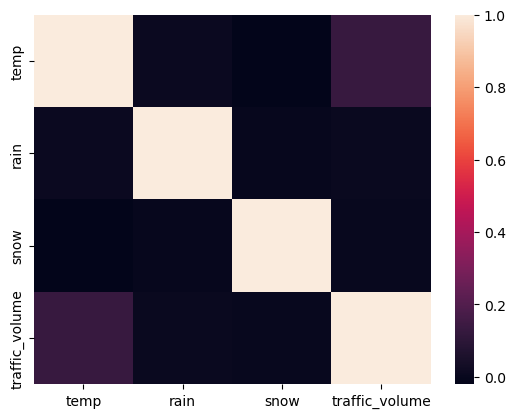

In [11]:
sns.heatmap(cor)

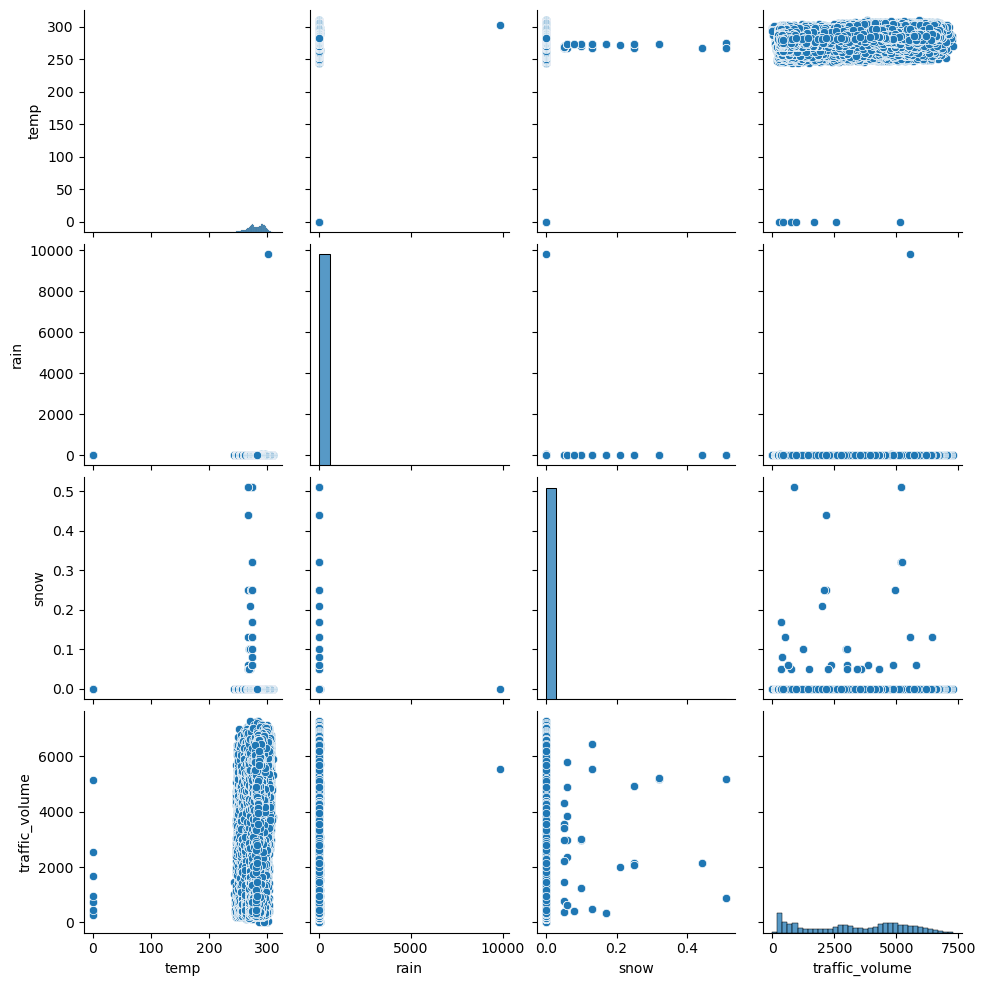

In [12]:
sns.pairplot(ds)

<AxesSubplot:>

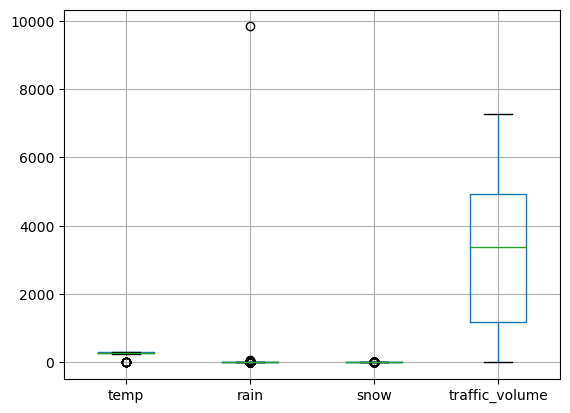

In [13]:
ds.boxplot()

In [14]:
ds[['day','month','year']]=ds['date'].str.split('-',expand=True)
ds[['hours','minutes','seconds']]=ds['Time'].str.split(':',expand=True)

In [15]:
ds.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume,day,month,year,hours,minutes,seconds
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918,02,10,2012,13,00,00


In [16]:
ds.drop(columns=['date','Time'],axis=1,inplace=True)

In [17]:
ds.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,None,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [18]:
y=ds['traffic_volume']
x=ds.drop(columns=['traffic_volume'],axis=1)

In [19]:
print(y)
print(x)

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48204, dtype: int64
      holiday    temp  rain  snow       weather day month  year hours minutes  \
0        None  288.28   0.0   0.0        Clouds  02    10  2012    09      00   
1        None  289.36   0.0   0.0        Clouds  02    10  2012    10      00   
2        None  289.58   0.0   0.0        Clouds  02    10  2012    11      00   
3        None  290.13   0.0   0.0        Clouds  02    10  2012    12      00   
4        None  291.14   0.0   0.0        Clouds  02    10  2012    13      00   
...       ...     ...   ...   ...           ...  ..   ...   ...   ...     ...   
48199    None  283.45   0.0   0.0        Clouds  30    09  2018    19      00   
48200    None  282.76   0.0   0.0        Clouds  30    09  2018    20      00   
48201    None  282.73   0.0   0.0  Thunderstorm  30    09  2018    

In [20]:
print(x.head())

  holiday    temp  rain  snow weather day month  year hours minutes seconds
0    None  288.28   0.0   0.0  Clouds  02    10  2012    09      00      00
1    None  289.36   0.0   0.0  Clouds  02    10  2012    10      00      00
2    None  289.58   0.0   0.0  Clouds  02    10  2012    11      00      00
3    None  290.13   0.0   0.0  Clouds  02    10  2012    12      00      00
4    None  291.14   0.0   0.0  Clouds  02    10  2012    13      00      00


In [21]:
print(y.head())

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64


In [22]:
names=x.columns

In [23]:
x['holiday'] = x['holiday'].replace('None', np.nan)

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

# Replace 'None' strings with NaN
x = x.replace('None', np.nan)

# Convert categorical columns into dummy/one-hot encoded columns
x = pd.get_dummies(x, columns=['holiday', 'weather'], dummy_na=True)

# Ensure all remaining columns are numeric
x = x.apply(pd.to_numeric)

# Save column names
names = x.columns

# Apply scaling
x_scaled = scale(x)
x = pd.DataFrame(x_scaled, columns=names)


In [25]:
print(x.head())

       temp      rain      snow       day    month      year     hours  \
0  0.530485 -0.007463 -0.027235 -1.574903  1.02758 -1.855294 -0.345548   
1  0.611467 -0.007463 -0.027235 -1.574903  1.02758 -1.855294 -0.201459   
2  0.627964 -0.007463 -0.027235 -1.574903  1.02758 -1.855294 -0.057371   
3  0.669205 -0.007463 -0.027235 -1.574903  1.02758 -1.855294  0.086718   
4  0.744939 -0.007463 -0.027235 -1.574903  1.02758 -1.855294  0.230807   

   minutes  seconds  holiday_Christmas Day  ...  weather_Drizzle  weather_Fog  \
0      0.0      0.0              -0.011157  ...        -0.197972    -0.138868   
1      0.0      0.0              -0.011157  ...        -0.197972    -0.138868   
2      0.0      0.0              -0.011157  ...        -0.197972    -0.138868   
3      0.0      0.0              -0.011157  ...        -0.197972    -0.138868   
4      0.0      0.0              -0.011157  ...        -0.197972    -0.138868   

   weather_Haze  weather_Mist  weather_Rain  weather_Smoke  weather_

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
Svr=svm.SVR()
XGB=xgboost.XGBRegressor()

In [28]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [29]:
Dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [30]:
Rand.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
Svr.fit(x_train,y_train)

SVR()

In [32]:
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
p1=lin_reg.predict(x_train)
p2=Dtree.predict(x_train)
p3=Rand.predict(x_train)
p4=Svr.predict(x_train)
p5=XGB.predict(x_train)

In [34]:
from sklearn import metrics

In [35]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.013649971849924
1.0
0.9742782841242621
-34.82573655799368
0.8464591241878575


In [36]:
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=Svr.predict(x_test)
p5=XGB.predict(x_test)

In [37]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-4.877567768398626
0.6887594368054888
0.7980168302616875
-34.07035127371447
0.8069470771532439


In [38]:
MSE=metrics.mean_squared_error(p3,y_test)

In [39]:
np.sqrt(MSE)

807.7073905243628

In [40]:
import pickle

In [44]:
# Inside your notebook or training script
import pickle
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Save with current sklearn version
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
